# Livrarias Necessárias

Para a execução deste notebook é necessário instalar todas as librarias usadas no bloco de "imports".
Para instalar podemos usar: "pip install" e dar run ao bloco. Com esta linha de código irá ser instalado nas suas livrarias python as livrarias necessárias para este notebook.

In [ ]:
#pip install pandas_datareader

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt
import pandas as pq
from pylab import rcParams
from matplotlib.ticker import ScalarFormatter

# Escolhemos usar %matplotlib notebook para usufruir da interatividade dos gráficos
%matplotlib notebook

# Efficient Frontier

Esta simulação serve para encontrar o/os portfólio/os que tem a melhor relação entre risco e retorno. Encontrando assim o portfolio mais eficiente e mais inteligente. Esta é uma ferramenta muito útil, principalmente para novos investidores.

## Segundo o método de Monte Carlo

Designa-se por método de Monte Carlo qualquer método de uma classe de métodos estatísticos que se baseiam em amostragens aleatórias massivas para obter resultados numéricos. Em suma, utilizam a aleatoriedade de dados para gerar um resultado para problemas que a priori são determinísticos.

In [4]:
# Lista de ativos pretendidos no portfólio
ativos = ["BTC-USD", "ETH-USD"]

# Data de início dos dados. Esta data tem que tem em conta a moeda/investimento mais recente no mercado, 
# por isso, decidimos nao utilizar o cardano para o cálculo de melhor portfólio. O cardano apenas permitiria
# obter dados a partir de 2018-09-01, pelo que, com esta data, achamos que nao temos dados suficientes para obter
# um resultado conclusivo
inicio = dt.datetime(2015, 9, 1)

# Criação de DataFrame com o ultimo preço ajustado de cada dia
data = pdr.get_data_yahoo(ativos, inicio)
data = data["Adj Close"]
data

Symbols,BTC-USD,ETH-USD
Date,,
2015-08-31,228.121002,1.351610
2015-09-01,229.283997,1.294790
2015-09-02,227.182999,1.264930
2015-09-03,230.298004,1.274410
2015-09-04,235.018997,1.338810
...,...,...
2021-05-23,38705.980469,2643.591064
2021-05-24,38402.222656,2706.628906
2021-05-25,39294.199219,2888.698730


In [11]:
# O retorno logaritmico dá-nos a diferença percentual de preço entre um dia com o dia anterior, 
# por isso a primeira linha de "log_returns" fica sem valores.
log_returns = np.log(data/data.shift()) #shift() neste caso serve para poder dividir com o preço do dia anterior
log_returns

Symbols,BTC-USD,ETH-USD
Date,,
2015-08-31,NaN,NaN
2015-09-01,0.005085,-0.042948
2015-09-02,-0.009206,-0.023332
2015-09-03,0.013618,0.007467
2015-09-04,0.020292,0.049298
...,...,...
2021-05-23,0.107222,0.225649
2021-05-24,-0.007879,0.023566
2021-05-25,0.022962,0.065102


In [75]:
# Simulação Monte Carlo

# Numero de portfólios a testar
n = 1000

# Criação das variáveis com zeros para nao ocorrer erros várias execuções
pesos = np.zeros((n,2))
expected_returns = np.zeros(n)
expected_volatilities = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    # Criação de percentagens para cada portfólio
    peso = np.random.random(2)
    # A soma de todas a percentagens tem que dar 1 (100%)
    peso /= peso.sum()
    # Alterar os zeros com as percentagens geradas
    pesos[i] = peso
    
    # Cálculo de retorno esperado. Aplicação das percentagens de cada portfólio ao retorno logaritmico médio de calculado 
    # anteriormente. Soma do retorno logaritmico do ETH com BTC. Por fim multiplica-se por 365 para obter o retorno anual.
    expected_returns[i] = np.sum(log_returns.mean()*peso)*365
    
    # Cálculo de volatilidade da moeda. Com o cov() é calculada a matriz de covariância dos retornos logarítmicos e multiplicado
    # por 365 dias. Raiz quadrada da (Multiplicação da matriz com as percentagens ao quadrado) Segundo a formula presente neste 
    # website: https://financetrainingcourse.com/education/2011/04/market-risk-metrics-portfolio-volatility/
    expected_volatilities[i] = np.sqrt(np.dot(peso, np.dot(log_returns.cov()*365, peso)))
    
    # Cálculo de "sharpe ratio". É a relação entre o retorno e a volatilidade do portfolio. 
    # Quanto maior o resultado melhor o portfolio
    sharpe_ratios[i] = expected_returns[i] / expected_volatilities[i]

<IPython.core.display.Javascript object>


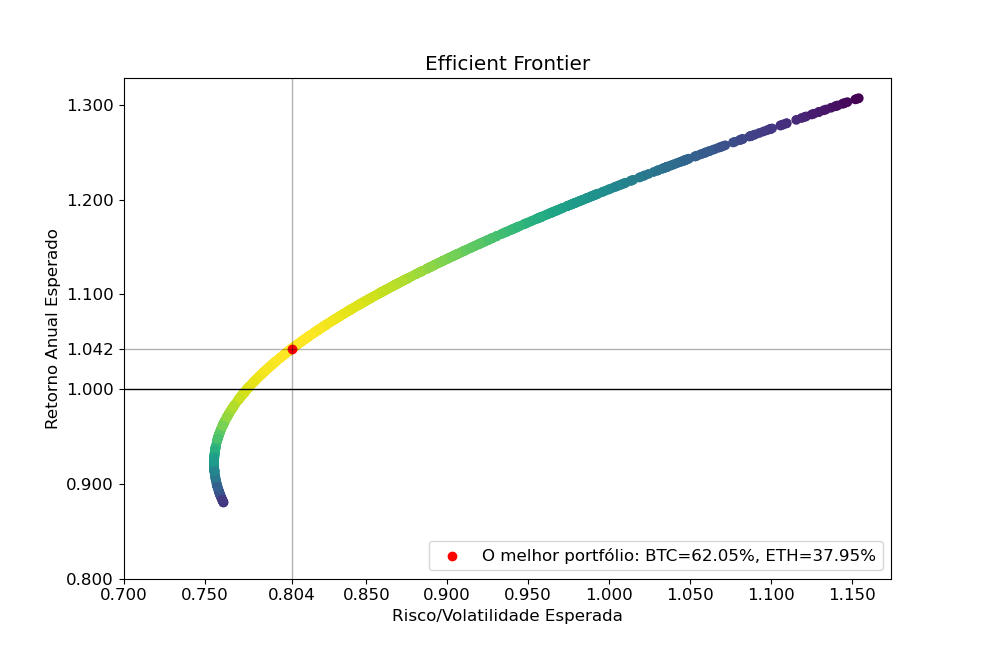

O melhor portfólio: BTC=62.05%, ETH=37.95%


Text(0, 0.5, 'Retorno Anual Esperado')

In [76]:
fig, ax = plt.subplots()

# Variável string para label do melhor portfolio
label_string="O melhor portfólio: BTC=" + str(round(pesos[sharpe_ratios.argmax()][0]*100, 2))+ "%, ETH=" +str(round(pesos[sharpe_ratios.argmax()][1]*100, 2)) + "%"
print(label_string)

# Gráfico de disperção
ax.scatter(expected_volatilities, 
           expected_returns, 
           c=sharpe_ratios)

# Portfólio com melhor relação risco-retorno
ax.scatter(expected_volatilities[sharpe_ratios.argmax()], 
           expected_returns[sharpe_ratios.argmax()], 
           c="r",
           label = label_string)

# Linha base com valo y de 1. Para informar que portfólios abaixo da linha não pertencem à fronteira eficiente
plt.axhline(y = 1, color = 'black', linewidth=1) 

plt.axvline(x = expected_volatilities[sharpe_ratios.argmax()], color = 'black', linewidth=1, alpha=0.3)
plt.axhline(y = expected_returns[sharpe_ratios.argmax()], color = 'black', linewidth=1, alpha=0.3) 

ax.set_yticks([0.8, 0.9, 1, 1.1, 1.2, 1.3, round(expected_returns[sharpe_ratios.argmax()],3)])
ax.set_xticks([0.7, 0.75, 0.85, 0.9, 0.95, 1, 1.05, 1.10, 1.15, round(expected_volatilities[sharpe_ratios.argmax()],3)])

# rcParams neste caso serve para controlar o tamanho da imagem renderizada e do texto
rcParams['figure.figsize'] = 9.9, 6.5
rcParams['font.size'] = 12
rcParams['figure.dpi'] = 100

plt.title("Efficient Frontier")
ax.legend()

ax.set_xlabel("Risco/Volatilidade Esperada")
ax.set_ylabel("Retorno Anual Esperado")